# Fichier de visualisation des fonction de cout pour le jeu virus/antivirus

## Imports

In [157]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

## Récupération des données

In [158]:
df_u = pd.read_csv('res_simu/cost_little_graph_unicast_virus2.csv')
df_b = pd.read_csv('res_simu/cost_little_graph_broadcast_virus2.csv')
df_c = pd.read_csv('res_simu/cost_little_graph_unicast_crazy_virus.csv')
df_s = pd.read_csv('res_simu/cost_little_graph_unicast_sneaky_virus.csv')

In [159]:
## unicast

k_tab_u = df_u['K'].to_numpy()
ep_tab_u = df_u['epidemic peak'].to_numpy()
df_u['nombre infectes'] = df_u['nombre infectes'].apply(ast.literal_eval)
inf_tab_u = df_u['nombre infectes'].to_numpy()
cost_tab_u = df_u['cost fun'].to_numpy()
delta_tab_u = df_u['delta fun'].to_numpy()

## broadcast

k_tab_b = df_b['K'].to_numpy()
ep_tab_b = df_b['epidemic peak'].to_numpy()
df_b['nombre infectes'] = df_b['nombre infectes'].apply(ast.literal_eval)
inf_tab_b = df_b['nombre infectes'].to_numpy()
cost_tab_b = df_b['cost fun'].to_numpy()
delta_tab_b = df_b['delta fun'].to_numpy()

## crazy

k_tab_c = df_c['K'].to_numpy()
ep_tab_c = df_c['epidemic peak'].to_numpy()
df_c['nombre infectes'] = df_c['nombre infectes'].apply(ast.literal_eval)
inf_tab_c = df_c['nombre infectes'].to_numpy()
cost_tab_c = df_c['cost fun'].to_numpy()
delta_tab_c = df_c['delta fun'].to_numpy()

## sneaky

k_tab_s = df_s['K'].to_numpy()
ep_tab_s = df_s['epidemic peak'].to_numpy()
df_s['nombre infectes'] = df_s['nombre infectes'].apply(ast.literal_eval)
inf_tab_s = df_s['nombre infectes'].to_numpy()
cost_tab_s = df_s['cost fun'].to_numpy()
delta_tab_s = df_s['delta fun'].to_numpy()

## Construction du coût du virus

In [161]:
gain_virus_u = [] # unicast
gain_virus_b = [] # broadcast
gain_virus_c = [] # crazy
gain_virus_s = [] # sneaky
tol = 0.9
nb_simu = 30


## unicast

for i in range(len(inf_tab_u)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_u[i][j])
        ind_max = np.argmax(t)
        t_max = t[ind_max]
        seuil = 0.9*t_max
        tab_max = t[(ind_max+1):]
        tab_maxf = tab_max[tab_max >= seuil]
        gain_moyen += len(tab_maxf)*t_max
    gain_moyen = gain_moyen/nb_simu
    gain_virus_u.append(gain_moyen)


## broadcast

for i in range(len(inf_tab_b)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_b[i][j])
        ind_max = np.argmax(t)
        t_max = t[ind_max]
        seuil = 0.9*t_max
        tab_max = t[(ind_max+1):]
        tab_maxf = tab_max[tab_max >= seuil]
        gain_moyen += len(tab_maxf)*t_max
    gain_moyen = gain_moyen/nb_simu
    gain_virus_b.append(gain_moyen)


## crazy

for i in range(len(inf_tab_c)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_c[i][j])
        ind_max = np.argmax(t)
        t_max = t[ind_max]
        seuil = 0.9*t_max
        tab_max = t[(ind_max+1):]
        tab_maxf = tab_max[tab_max >= seuil]
        gain_moyen += len(tab_maxf)*t_max
    gain_moyen = gain_moyen/nb_simu
    gain_virus_c.append(gain_moyen)


## sneaky

for i in range(len(inf_tab_s)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_s[i][j])
        ind_max = np.argmax(t)
        t_max = t[ind_max]
        seuil = 0.9*t_max
        tab_max = t[(ind_max+1):]
        tab_maxf = tab_max[tab_max >= seuil]
        gain_moyen += len(tab_maxf)*t_max
    gain_moyen = gain_moyen/nb_simu
    gain_virus_s.append(gain_moyen)


## Construction de la matrice de gains

In [162]:
res_uni = []
res_broad = []
res_crazy = []
res_sneaky = []

for j in range(5, len(gain_virus_b), 5): 
    res_uni.append((gain_virus_u[j], cost_tab_u[j]))
    res_broad.append((gain_virus_b[j], cost_tab_b[j]))
    res_crazy.append((gain_virus_c[j], cost_tab_c[j]))
    res_sneaky.append((gain_virus_s[j], cost_tab_s[j]))
    
gains = [res_uni, res_broad, res_crazy, res_sneaky]

In [163]:
print(np.array(gains))

[[[15850.           977.28811777]
  [ 3983.16666667   900.67623554]
  [ 3441.6          769.13101998]
  [ 3420.03333333   713.31913775]
  [ 2890.23333333   721.50725552]
  [ 2676.33333333   677.02870662]
  [ 2758.9          707.65015773]
  [ 2633.83333333   721.57160883]
  [ 2500.9          721.12639327]
  [ 2555.7          731.91451104]
  [ 2122.83333333   751.06929548]
  [ 2529.6          783.59074658]
  [ 2578.13333333   798.14553102]
  [ 2049.26666667   800.40031546]
  [ 2161.23333333   819.45509989]
  [ 2115.9          830.90988433]
  [ 2379.2          869.06466877]
  [ 1986.83333333   891.48611987]
  [ 2375.23333333   949.90757098]
  [ 2220.93333333   942.22902208]
  [ 1985.5          991.11713985]
  [ 1915.53333333   975.20525762]
  [ 2217.33333333  1016.59337539]
  [ 2134.13333333  1035.58149317]
  [ 2353.83333333  1096.06961094]
  [ 2036.36666667  1085.52439537]
  [ 2212.7         1118.04584648]
  [ 2066.73333333  1167.93396425]
  [ 1919.4         1165.58874869]
  [ 2073.8    

## Affichage

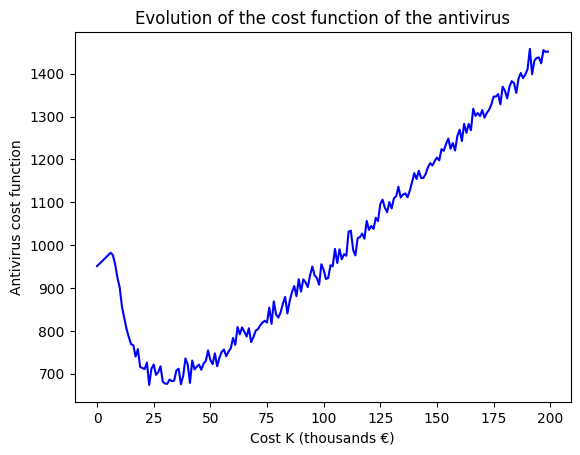

In [164]:
plt.plot(k_tab_u, cost_tab_u, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("unicast_antivirus.png")
plt.show()

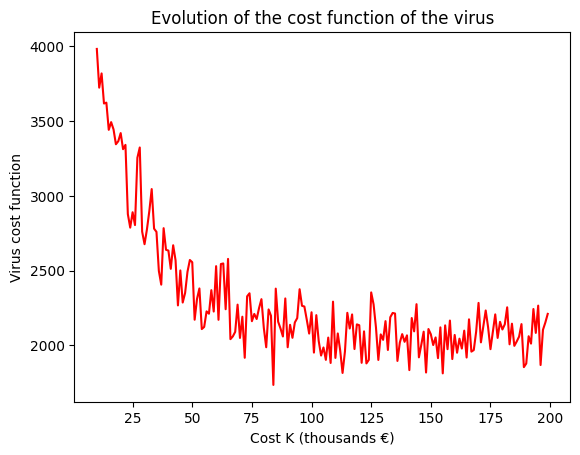

In [165]:
plt.plot(k_tab_u[10:], gain_virus_u[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("unicast_virus.png")
plt.show()

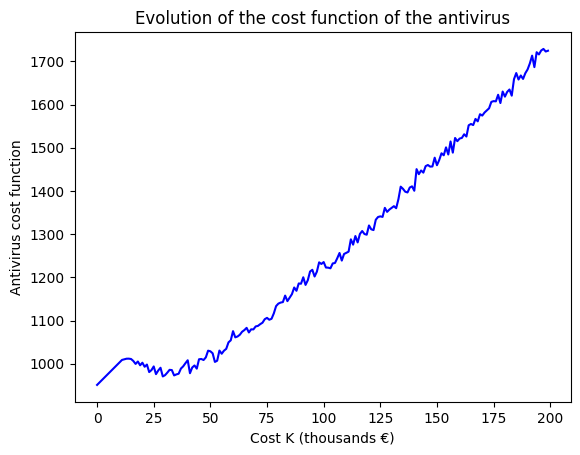

In [166]:
plt.plot(k_tab_b, cost_tab_b, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("broadcast_antivirus.png")
plt.show()

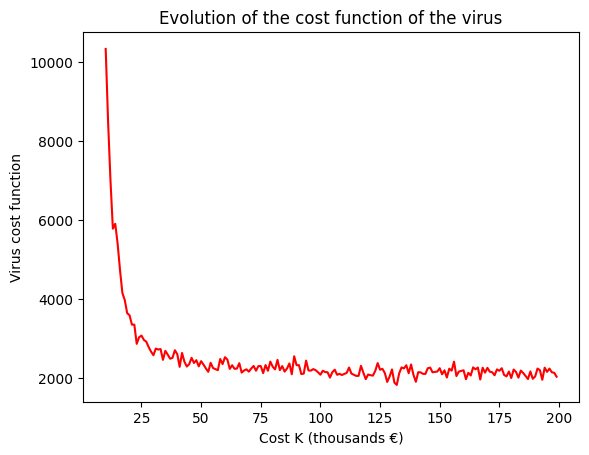

In [167]:
plt.plot(k_tab_b[10:], gain_virus_b[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("broadcast_virus.png")
plt.show()

In [ ]:
plt.plot(k_tab_c, cost_tab_c, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("crazy_antivirus.png")
plt.show()

In [ ]:
plt.plot(k_tab_c[10:], gain_virus_c[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("crazy_virus.png")
plt.show()

In [ ]:
plt.plot(k_tab_s, cost_tab_s, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("sneaky_antivirus.png")
plt.show()

In [ ]:
plt.plot(k_tab_s[10:], gain_virus_s[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("sneaky_virus.png")
plt.show()